In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as im
from skimage.feature import canny
from skimage.transform import hough_circle, hough_circle_peaks

input_file_centers = "kugelmitte.txt"
input_file_height = "hohe_px.txt"
input_file_schlieren = "schlieren_width.txt"
output_file_speed = "speed.txt"
output_file_schliere = "schlieren_real.txt"
image_names = np.loadtxt(input_file_centers, skiprows=1, usecols=0, dtype=str)

#Erdbeschleunigung
g = 9.81

#Realgröße der Kugel
r_real = 18.26e-3 / 2
del_r_real = 0.02e-3

#Hohe von Brett bis zur Spiegelunterkante
d1 = 466e-3         #Tisch zu Brett
del_d1 = 2e-3
d2 = 62e-3          #Tisch zu Spiegel
del_d2 = 2e-3
d3 = 34e-3          #Spiegelunterkante zu Spiegel
del_d3 = 2e-3

dges = d1 - d2 - d3 #Spiegelunterkante zu Brett im Realen Bild
del_dges = np.sqrt(del_d1**2 + del_d2**2 + del_d3**3)

#Höhen im Bild
r_min = np.loadtxt(input_file_centers, skiprows=1, usecols=4)
r_max = np.loadtxt(input_file_centers, skiprows=1, usecols=5)
r_px = np.loadtxt(input_file_centers, skiprows=1, usecols=3)
del_r_px = np.max([np.abs(r_px-r_min),np.abs(r_px-r_max)])

y_centers = np.loadtxt(input_file_centers, skiprows=1, usecols=2)
del_y_centers = del_r_px

edges = np.loadtxt(input_file_height, skiprows=1, usecols=2)
del_edges = np.loadtxt(input_file_height, skiprows=1, usecols=3)

h_px = edges - y_centers - r_px #Kugelunterkante bis Kugel in PX
del_h_px = np.sqrt(del_edges**2 + del_y_centers**2 + del_r_px**2)

#Schlieren im Bild
widths_px = np.loadtxt(input_file_schlieren, skiprows=1, usecols=1)

#Konvertierung zu realen Größen

a = r_real/r_px #Konvertierungsfaktor von px zu real
del_a = np.sqrt((del_r_real/r_px)**2 + (-r_real*del_r_px/r_px**2)**2)

h_real = a * h_px
del_h_real = np.sqrt((h_px*del_a)**2 + (a*del_h_px)**2)

widths_real = a*widths_px
del_widths_real = widths_px*del_a

#Berechnung der Gesamtfallhöhe

fallheight = dges - h_real
del_fallheight = np.sqrt(del_dges**2 + del_h_real**2)

#Berechnung derFalldauer
t = np.sqrt(2*fallheight/g)
del_t = np.sqrt(del_fallheight**2 * 1 / (2 * np.sqrt(2*fallheight/g)))

#Berechnung der Geschwindigkeit
v = g*t
del_v = np.sqrt(g)*del_t

#Speichern der Größen
with open(output_file_speed, "w") as f:
        f.write(f'Name: v: d_v \n')
for i in range(len(v)):
    with open(output_file_speed, "a") as f:
        f.write(f'{image_names[i]} {v[i]} {del_v[i]}\n')

with open(output_file_schliere, "w") as f:
        f.write(f'Name: 	     schlieren_width:  schlieren_abw: \n')
for i in range(len(v)):
    with open(output_file_schliere, "a") as f:
        f.write(f'{image_names[i]} {widths_real[i]} {del_widths_real[i]}\n')

[4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05 4.43203883e-05 4.43203883e-05 4.43203883e-05
 4.43203883e-05]


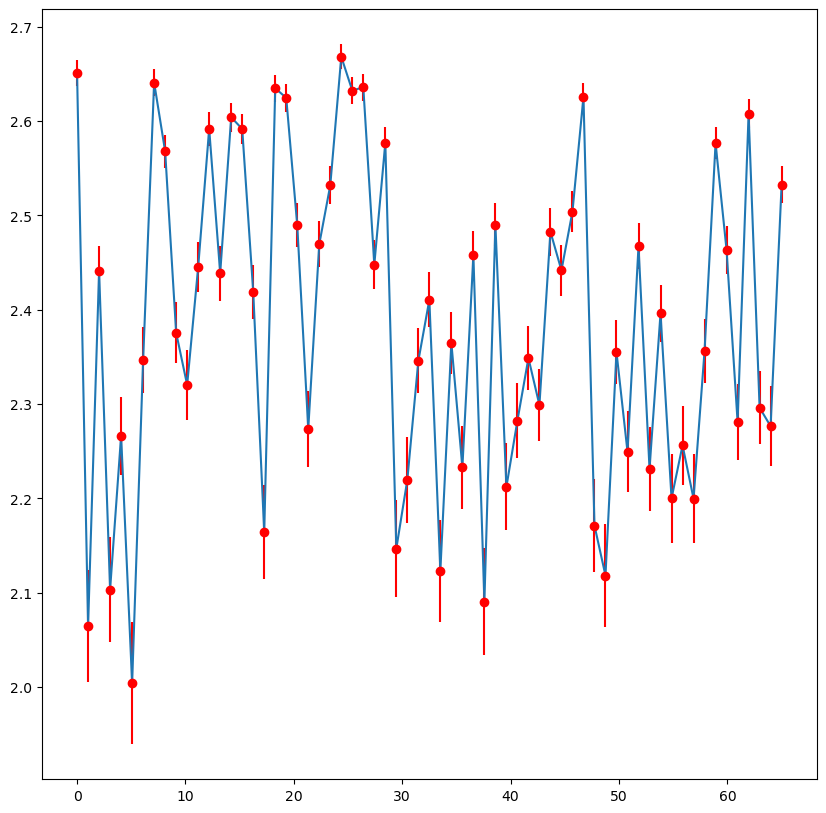

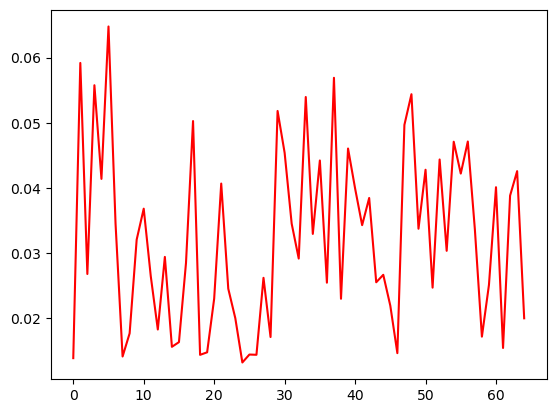

In [40]:
grosse = v
delta = del_v

x = np.linspace(0, len(image_names), len(image_names))
plt.figure(figsize=(10,10))
plt.errorbar(x, grosse, delta, fmt = 'o', color="r")
plt.plot(x, grosse)
plt.show()

plt.plot(delta, color="r")